In [1]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/users/Delvefohoue/downloads/MaunaLoaDailyTemps.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [9]:

df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [11]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [13]:
#Change columns name for facebook prophet

df.columns = ['ds','y']

In [15]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


<Axes: xlabel='ds'>

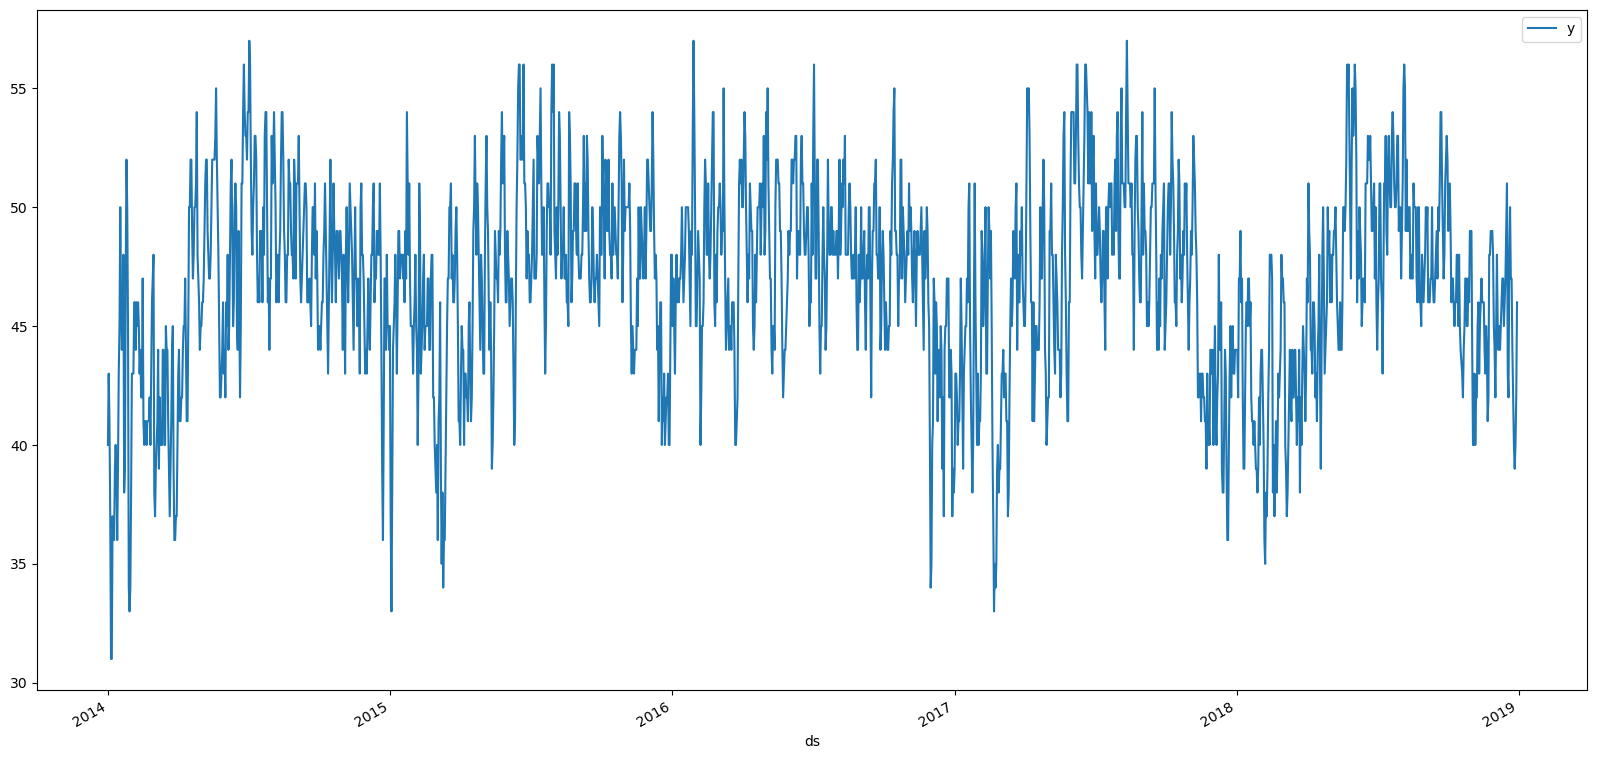

In [21]:
df.plot(x='ds',y='y',figsize=(20,10))

In [23]:
len(df)

1821

In [25]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [53]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=3650) #MS for monthly, H for hourly
forecast = m.predict(future)

20:03:44 - cmdstanpy - INFO - Chain [1] start processing
20:03:44 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5101,2027-12-23,43.948625,-9.762712,90.856953,-4.672228,95.632036,-4.502305,-4.502305,-4.502305,0.098645,0.098645,0.098645,-4.600949,-4.600949,-4.600949,0.0,0.0,0.0,39.446320
5102,2027-12-24,43.947932,-9.196881,90.214367,-4.684981,95.649098,-4.282142,-4.282142,-4.282142,0.426890,0.426890,0.426890,-4.709032,-4.709032,-4.709032,0.0,0.0,0.0,39.665791
5103,2027-12-25,43.947240,-10.225557,90.990917,-4.697735,95.666706,-4.797377,-4.797377,-4.797377,-0.005791,-0.005791,-0.005791,-4.791586,-4.791586,-4.791586,0.0,0.0,0.0,39.149863
5104,2027-12-26,43.946547,-10.448861,89.739475,-4.710488,95.684860,-5.086408,-5.086408,-5.086408,-0.239269,-0.239269,-0.239269,-4.847138,-4.847138,-4.847138,0.0,0.0,0.0,38.860140
5105,2027-12-27,43.945855,-10.129174,91.646049,-4.723242,95.703014,-4.956683,-4.956683,-4.956683,-0.081999,-0.081999,-0.081999,-4.874685,-4.874685,-4.874685,0.0,0.0,0.0,38.989172


In [57]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5101,2027-12-23,39.446320,-9.762712,90.856953
5102,2027-12-24,39.665791,-9.196881,90.214367
5103,2027-12-25,39.149863,-10.225557,90.990917
5104,2027-12-26,38.860140,-10.448861,89.739475
5105,2027-12-27,38.989172,-10.129174,91.646049


In [59]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


In [61]:
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.io as pio

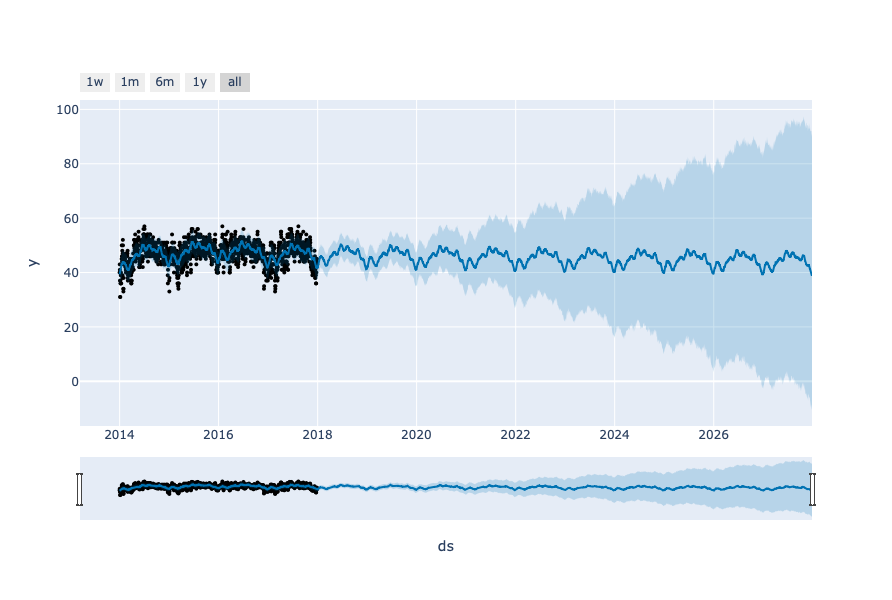

In [63]:
#USING BUILT-IN FB PROPHET VISUALIZATION 
plot_plotly(m ,forecast)



/opt/anaconda3/lib/python3.11/site-packages/plotly/io/_json.py:560: UserWarning:

Discarding nonzero nanoseconds in conversion.



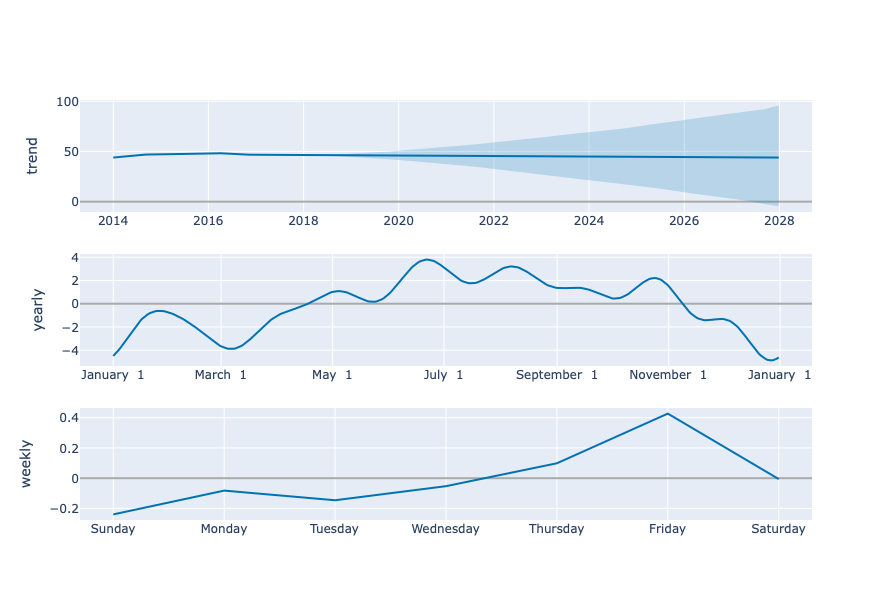

In [65]:
#Decomposition

plot_components_plotly(m, forecast)

In [67]:
from statsmodels.tools.eval_measures import rmse

In [69]:

predictions = forecast.iloc[-365:]['yhat']

In [71]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  4.123092923183852
Mean Value of Test Dataset: 46.3041095890411
